# <left> Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Walmart_E.csv')

#Display raw data
display(df.head())
original_df = df.copy(deep=True)

,Unnamed: 0,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [2]:
# Removal of any Duplicate rows (if any)

num_duplicates = df.duplicated().sum()

if num_duplicates == 0:
    print('Inference: The dataset does not have any duplicates.')
else:
    df.drop_duplicates(inplace=True)
    print(f'Inference: {num_duplicates} duplicate rows have been dropped.')

Inference: The dataset does not have any duplicates.


In [3]:
#Checking number of unique rows in each feature
import math

target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]

nu = df[features].nunique().sort_values()
nf = []; cf = [];nnf = 0; ncf = 0;  #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

In [4]:
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

print('\n\033[1mInference:\033[0m The dataset doesn\'t have any inconsistent values.')

              Total Null Values  Percentage
Unnamed: 0                    0         0.0
Store                         0         0.0
Weekly_Sales                  0         0.0
Holiday_Flag                  0         0.0
Temperature                   0         0.0
Fuel_Price                    0         0.0
CPI                           0         0.0
Unemployment                  0         0.0
day                           0         0.0
month                         0         0.0
year                          0         0.0

Inference: The dataset doesn't have any inconsistent values.


In [5]:
num_missing = df.isnull().sum()
percent_missing = round(num_missing / len(df) * 100, 2)
missing_df = pd.concat([num_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent Missing'])
missing_df.sort_values('Total Missing', ascending=False, inplace=True)

print('Missing data summary:')
print(missing_df)

print('\nInference: The dataset does not have any missing values.')

Missing data summary:
              Total Missing  Percent Missing
Unnamed: 0                0              0.0
Store                     0              0.0
Weekly_Sales              0              0.0
Holiday_Flag              0              0.0
Temperature               0              0.0
Fuel_Price                0              0.0
CPI                       0              0.0
Unemployment              0              0.0
day                       0              0.0
month                     0              0.0
year                      0              0.0

Inference: The dataset does not have any missing values.


In [6]:

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

One-Hot Encoding on features:
Holiday_Flag

Dummy Encoding on features:
year
day
month
Store


(6435, 70)

In [7]:
# Create a copy of the dataframe
df_encoded = df.copy()

# Loop through categorical features
for col in df.select_dtypes(include='object').columns:
    
    # Check if the feature has less than or equal to 2 unique values
    if df_encoded[col].nunique() <= 2:
        # Use LabelEncoder to convert binary categorical features to numeric
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
    else:
        # Use get_dummies to create one-hot encoded columns for non-binary categorical features
        df_encoded = pd.get_dummies(df_encoded, columns=[col], prefix=[col], drop_first=True)

print('\033[1mEncoded Dataset shape:\033[0m', df_encoded.shape)

Encoded Dataset shape: (6435, 11)


In [8]:
#Removal of outliers:

df1 = df3.copy()

features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1.loc[(df1[i] >= (Q1 - 1.5*IQR)) & (df1[i] <= (Q3 + 1.5*IQR))]

df1.reset_index(drop=True, inplace=True)
display(df1.head())
print(f'\n\033[1mInference:\033[0m\nBefore removal of outliers, the dataset had {df3.shape[0]} samples.')
print(f'After removal of outliers, the dataset now has {df1.shape[0]} samples.')

,Unnamed: 0,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year_2011,year_2012,day_1,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,0,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Inference:
Before removal of outliers, the dataset had 6435 samples.
After removal of outliers, the dataset now has 5953 samples.


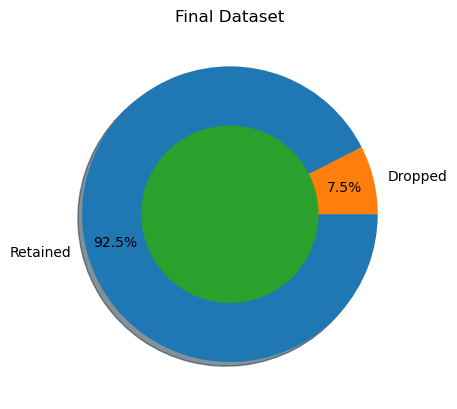


Inference: After the cleanup process, 482 samples were dropped, while retaining 92.51% of the data.


In [9]:
# Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns = df.columns.str.replace('-', '_')

fig, ax = plt.subplots()

retained = df.shape[0]
dropped = original_df.shape[0] - df.shape[0]
percent_retained = round(retained / original_df.shape[0] * 100, 2)

labels = ['Retained', 'Dropped']
sizes = [retained, dropped]
colors = ['#00FF00', '#FF0000']

ax.pie(sizes, labels=labels, counterclock=False,
       autopct='%1.1f%%', pctdistance=0.8, explode=[0, 0], shadow=True)
ax.pie([retained],labeldistance=-0, radius=0.6)

plt.title('Final Dataset')
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {dropped} samples were dropped, while retaining {percent_retained}% of the data.')

In [10]:
#export file as .csv
df1.to_csv("Cleaned.csv")

                                       Correlation Matrix                                       


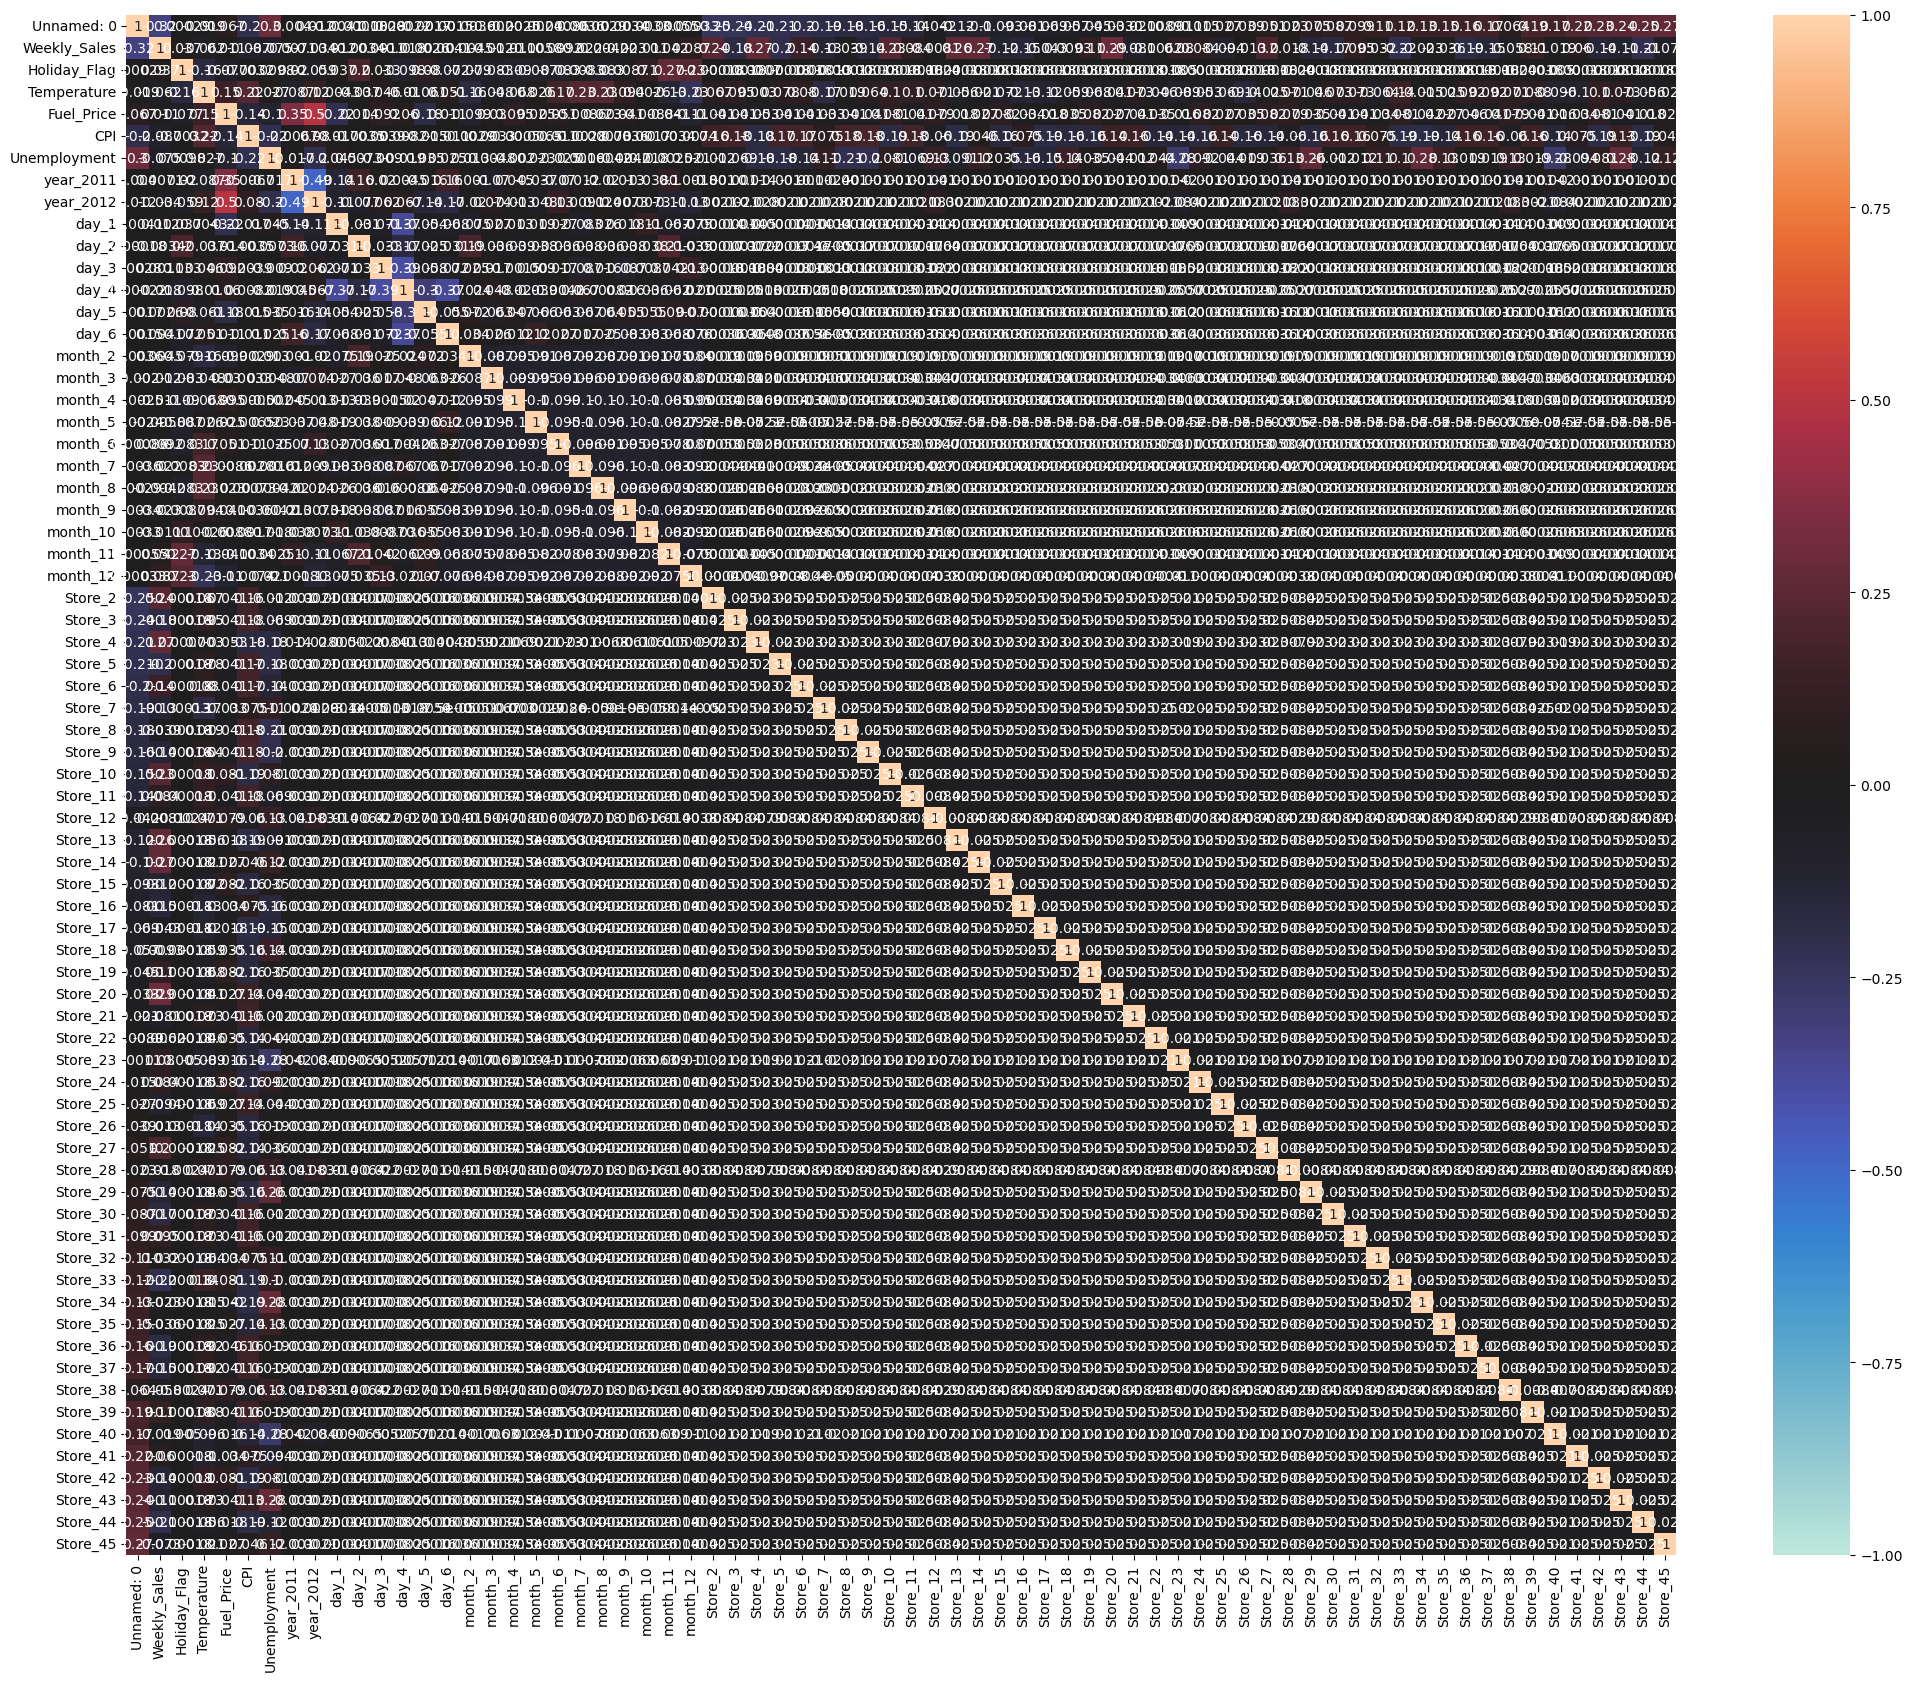

In [14]:
import seaborn as sb

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sb.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()